In [1]:
import pandas as pd
pd.set_option('display.max_colwidth', 200)
pd.set_option('display.max_column', 25)
pd.set_option('display.max_row', 25)

import numpy as np
from datetime import datetime
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from pathlib import Path
import os
import glob

current_dir = Path.cwd()
data_dir = current_dir.parent/'raw_data'
viz_dir = current_dir.parent/'visualizations'
os.makedirs(viz_dir, exist_ok=True)

for file in glob.glob(f'{data_dir}/*'): 
    print(file)

/Users/keenansmacbookairm3/Documents/GitHub/SnowDay_NYC/raw_data/plownyc_dropduplicated.parquet
/Users/keenansmacbookairm3/Documents/GitHub/SnowDay_NYC/raw_data/nyc_centerline_shapefile.parquet
/Users/keenansmacbookairm3/Documents/GitHub/SnowDay_NYC/raw_data/snow_or_ice_311Complaints.parquet


In [3]:
plow_nyc_df = pd.read_parquet(glob.glob(f'{data_dir}/*plownyc_dropduplicated.parquet'))
plow_nyc_df.info(verbose=True, show_counts=True)

<class 'pandas.core.frame.DataFrame'>
Index: 8028286 entries, 0 to 6307101
Data columns (total 3 columns):
 #   Column        Non-Null Count    Dtype 
---  ------        --------------    ----- 
 0   physical_id   8028286 non-null  object
 1   last_visited  8028286 non-null  object
 2   snapshot      8028286 non-null  object
dtypes: object(3)
memory usage: 245.0+ MB


<Axes: xlabel='last_visited'>

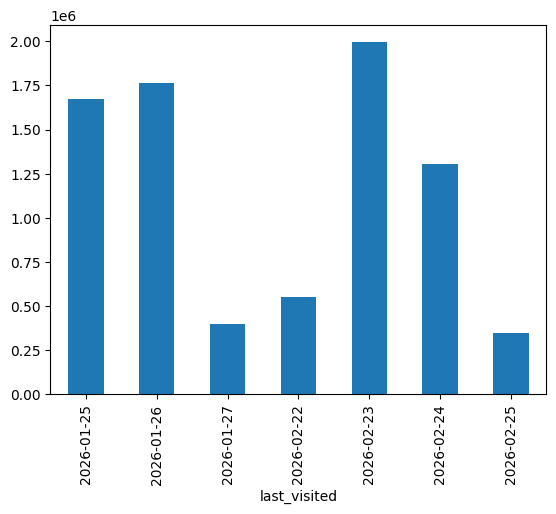

In [4]:
pd.to_datetime(plow_nyc_df.last_visited).dt.date.value_counts().sort_index().plot(kind='bar')

In [5]:
# Some intersections have been visited at a much higher rates than the others
# Presumbly the area surrouding sanitation department facilities
plow_nyc_df.physical_id.value_counts().describe()

count    99892.000000
mean        80.369659
std         64.459739
min          1.000000
25%         34.000000
50%         60.000000
75%        110.000000
max        408.000000
Name: count, dtype: float64

In [6]:
plow_nyc_summary= plow_nyc_df.physical_id.value_counts().reset_index(name='plow_count')
plow_nyc_summary

,physical_id,plow_count
0,119430,408
1,81322,407
2,120433,407
3,164163,407
4,81306,407
...,...,...
99887,197861,1
99888,92290,1
99889,123071,1
99890,75066,1


In [7]:
# Import NYC centerline shapefile
nyc_shapefile_df= pd.read_parquet(glob.glob(f'{data_dir}/*nyc_centerline_shapefile.parquet'))
nyc_shapefile_df.info(verbose=True, show_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 122247 entries, 0 to 122246
Data columns (total 55 columns):
 #   Column                  Non-Null Count   Dtype 
---  ------                  --------------   ----- 
 0   the_geom                122247 non-null  object
 1   physicalid              122247 non-null  object
 2   l_low_hn                84555 non-null   object
 3   l_high_hn               84555 non-null   object
 4   r_low_hn                84555 non-null   object
 5   r_high_hn               84555 non-null   object
 6   l_zip                   120886 non-null  object
 7   r_zip                   120964 non-null  object
 8   status                  122247 non-null  object
 9   trafdir                 122245 non-null  object
 10  rw_type                 122247 non-null  object
 11  pre_type                2862 non-null    object
 12  objectid                122247 non-null  object
 13  l_blockfaceid           109634 non-null  object
 14  r_blockfaceid           109629 non-n

In [8]:
nyc_shapefile_df

,the_geom,physicalid,l_low_hn,l_high_hn,r_low_hn,r_high_hn,l_zip,r_zip,status,trafdir,rw_type,pre_type,...,bike_trafdir,rwjurisdiction,carto_display_level,post_modifier,post_directional,within_bndy_dist,continuous_parity_flag,accessible,borough_indicator,pre_modifier,sandist_ind,fcc
0,"b'{""type"":""MultiLineString"",""coordinates"":[[[-73.965287415722,40.615000858808],[-73.964359884699,40.615102135719]]]}'",46810,901,999,900,998,11230,11230,2,FT,1,AVE,...,None,None,None,None,None,None,None,None,None,None,None,None
1,"b'{""type"":""MultiLineString"",""coordinates"":[[[-73.857805049963,40.863044490364],[-73.857734247232,40.865485912644]]]}'",86757,2501,2599,2500,2598,10469,10469,2,TW,1,None,...,None,None,None,None,None,None,None,None,None,None,None,None
2,"b'{""type"":""MultiLineString"",""coordinates"":[[[-73.901047993134,40.769320483382],[-73.902742096389,40.767935194633]]]}'",84282,22-001,22-099,22-000,22-098,11105,11105,2,TF,1,None,...,None,None,None,None,None,None,None,None,None,None,None,None
3,"b'{""type"":""MultiLineString"",""coordinates"":[[[-74.010562603546,40.7222098984],[-74.011631470957,40.72231827029]]]}'",79741,79,107,78,100,10013,10013,2,FT,1,None,...,None,None,None,None,None,None,None,None,None,None,None,None
4,"b'{""type"":""MultiLineString"",""coordinates"":[[[-74.121613808175,40.558468264066],[-74.121533964787,40.558385459768],[-74.121461513545,40.558298791091],[-74.121396774845,40.558208641291]],[[-74.12139...",184200,0,0,74,86,10306,10306,2,TW,1,None,...,None,None,None,None,None,None,None,None,None,None,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
122242,"b'{""type"":""MultiLineString"",""coordinates"":[[[-74.10873098558,40.617945260072],[-74.108844216424,40.617934993284],[-74.108884249796,40.617931363549]]]}'",198966,None,None,None,None,None,None,2,NV,3,None,...,TW,None,None,None,None,None,None,None,None,None,None,None
122243,"b'{""type"":""MultiLineString"",""coordinates"":[[[-73.891007114917,40.647529676589],[-73.891060513741,40.647496281968],[-73.891521424381,40.647208155548]]]}'",108062,None,None,None,None,11236,11236,2,TW,10,None,...,None,None,None,None,None,None,None,None,None,None,None,None
122244,"b'{""type"":""MultiLineString"",""coordinates"":[[[-73.844175615239,40.734248465615],[-73.843906011168,40.734311790988]]]}'",126810,None,None,None,None,11367,11367,2,NV,7,None,...,None,None,None,None,None,None,None,None,None,None,None,None
122245,"b'{""type"":""MultiLineString"",""coordinates"":[[[-73.854182545839,40.721484169919],[-73.854204468829,40.721450428922],[-73.854391741164,40.721161745431]]]}'",200808,None,None,None,None,11375,11375,2,TW,10,None,...,None,None,None,None,None,None,None,None,None,None,None,None


In [9]:
nyc_shapefile_df.columns

Index(['the_geom', 'physicalid', 'l_low_hn', 'l_high_hn', 'r_low_hn',
       'r_high_hn', 'l_zip', 'r_zip', 'status', 'trafdir', 'rw_type',
       'pre_type', 'objectid', 'l_blockfaceid', 'r_blockfaceid', 'boroughcode',
       'seglocstatus', 'lsubsect', 'rsubsect', 'twisted_parity_flag',
       'posted_speed', 'segmentlength', 'streetwidth', 'created_date',
       'modified_date', 'from_level_code', 'to_level_code', 'b5sc',
       'snow_priority', 'number_travel_lanes', 'number_park_lanes',
       'number_total_lanes', 'full_street_name', 'shape_length', 'globalid',
       'street_name', 'stname_label', 'post_type', 'collectionmethod',
       'pre_directional', 'truck_route_type', 'nonped', 'bike_lane',
       'bike_trafdir', 'rwjurisdiction', 'carto_display_level',
       'post_modifier', 'post_directional', 'within_bndy_dist',
       'continuous_parity_flag', 'accessible', 'borough_indicator',
       'pre_modifier', 'sandist_ind', 'fcc'],
      dtype='object')

In [10]:
boroughcode_dict = {
    '1' : 'Manhattan',
    '2' : 'Bronx',
    '3' : 'Brooklyn',
    '4' : 'Queens',
    '5' : 'Staten Island'
} 

nyc_shapefile_df['borough_text'] = nyc_shapefile_df['boroughcode'].map(boroughcode_dict)
nyc_shapefile_df.borough_text.value_counts(dropna=False)

borough_text
Queens           45269
Brooklyn         27580
Bronx            18671
Staten Island    16757
Manhattan        13970
Name: count, dtype: int64

In [11]:
street_type_dict = {
    "1": "Street",
    "2": "Highway",
    "3": "Bridge",
    "4": "Tunnel",
    "5": "Boardwalk",
    "6": "Path/Trail",
    "7": "StepStreet",
    "8": "Driveway",
    "9": "Ramp",
    "10": "Alley",
    "11": "Unknown",
    "12": "Non-Physical Street Segment",
    "13": "U Turn",
    "14": "Ferry Route"
}


nyc_shapefile_df['rw_type_text'] = nyc_shapefile_df.rw_type.map(street_type_dict)
nyc_shapefile_df['rw_type_text'].value_counts(dropna=False)

rw_type_text
Street                         99440
Path/Trail                      5897
Highway                         4144
Alley                           3765
Ramp                            3603
Bridge                          3342
Driveway                         805
Ferry Route                      428
U Turn                           300
StepStreet                       241
Tunnel                           168
Boardwalk                        106
Non-Physical Street Segment        8
Name: count, dtype: int64

In [12]:
nyc_shapefile_df.shape

(122247, 57)

In [13]:
rw_to_keep = [
    'Street', 
    'Highway', 
    'Ramp', 
    'Bridge', 
    'U Turn', 
    'Tunnel'
 ]

In [14]:
# Drop ferry route

nyc_shapefile_df = nyc_shapefile_df[nyc_shapefile_df.rw_type_text.isin(rw_to_keep)]
nyc_shapefile_df.shape

(110997, 57)

In [15]:
# Only look at input starting on Feb 22, 2026

plow_nyc_df = plow_nyc_df.query("last_visited>= '2026-02-22'")
plow_nyc_df

,physical_id,last_visited,snapshot
index,,,
0,17001,2026-02-22T18:00:00.000,2026-02-22T19:00:15.000
1,19536,2026-02-22T18:00:00.000,2026-02-22T19:00:15.000
2,21723,2026-02-22T18:00:00.000,2026-02-22T19:00:15.000
3,2410,2026-02-22T18:00:00.000,2026-02-22T19:00:15.000
4,2792,2026-02-22T18:00:00.000,2026-02-22T19:00:15.000
...,...,...,...
6307097,122212,2026-02-25T05:15:00.000,2026-02-25T05:15:10.000
6307098,182639,2026-02-25T05:15:00.000,2026-02-25T05:15:10.000
6307099,191086,2026-02-25T05:15:00.000,2026-02-25T05:15:10.000


In [16]:
# Calculate the number of vists by snow removal trucks per unique street 
plow_nyc_summary= plow_nyc_df.physical_id.value_counts().reset_index(name='trucks_visit_count')
plow_nyc_summary

,physical_id,trucks_visit_count
0,119430,226
1,164163,225
2,90897,225
3,120433,225
4,81322,225
...,...,...
99678,47852,1
99679,33019,1
99680,134333,1
99681,99538,1


In [17]:
bins = [0, 2, 5, 9, 12, 16, 25, 36, plow_nyc_summary.trucks_visit_count.max()]
labels = ['0', '1-2', '3-5', '6-9', '10-12', '13-16', '17-25', '26-36+']
plow_nyc_summary['plow_bracket'] = pd.cut(
    plow_nyc_summary.trucks_visit_count,
    bins=bins,
    labels=labels,
    include_lowest=True
)
plow_nyc_summary

,physical_id,trucks_visit_count,plow_bracket
0,119430,226,26-36+
1,164163,225,26-36+
2,90897,225,26-36+
3,120433,225,26-36+
4,81322,225,26-36+
...,...,...,...
99678,47852,1,0
99679,33019,1,0
99680,134333,1,0
99681,99538,1,0


In [18]:
df = nyc_shapefile_df.merge(plow_nyc_summary, 
                            right_on='physical_id', left_on='physicalid', how='left')

df['trucks_visit_count'] = df['trucks_visit_count'].fillna(0)

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110997 entries, 0 to 110996
Data columns (total 60 columns):
 #   Column                  Non-Null Count   Dtype   
---  ------                  --------------   -----   
 0   the_geom                110997 non-null  object  
 1   physicalid              110997 non-null  object  
 2   l_low_hn                83959 non-null   object  
 3   l_high_hn               83959 non-null   object  
 4   r_low_hn                83959 non-null   object  
 5   r_high_hn               83959 non-null   object  
 6   l_zip                   110688 non-null  object  
 7   r_zip                   110775 non-null  object  
 8   status                  110997 non-null  object  
 9   trafdir                 110995 non-null  object  
 10  rw_type                 110997 non-null  object  
 11  pre_type                2769 non-null    object  
 12  objectid                110997 non-null  object  
 13  l_blockfaceid           104194 non-null  object  
 14  r_bl

In [19]:
from shapely.geometry import shape
import json
import geopandas as gpd

# Unpacking and processing the_geom field into geometry
def bytes_to_geometry(b):
    if pd.isna(b):
        return None
    return shape(json.loads(b.decode('utf-8')))

df['geometry'] = df['the_geom'].apply(bytes_to_geometry)

# Create a new geoPandas dataframe 
gdf = gpd.GeoDataFrame(df, geometry='geometry')

In [21]:
import geopandas as gpd
from shapely.geometry import shape
import requests

nta_url = 'https://data.cityofnewyork.us/resource/9nt8-h7nd.json'
nta_response = requests.get(nta_url)
nta_df = pd.DataFrame(nta_response.json())

nta_df['the_geom'] = nta_df['the_geom'].apply(shape)
nta_gdf = gpd.GeoDataFrame(nta_df, geometry='the_geom')

nta_gdf = nta_gdf.set_crs("EPSG:4326")

gdf = gdf.set_crs("EPSG:4326")
nta_gdf = nta_gdf.to_crs(gdf.crs)


result = gpd.sjoin(
    gdf,
    nta_gdf[['the_geom', 'ntaname']],
    how="left",
    predicate="within"
)

gdf['nta_neighborhood'] = result['ntaname']

In [22]:
nta_count = gdf.groupby(['nta_neighborhood', 'borough_text']).trucks_visit_count.sum().reset_index()
nta_count

,nta_neighborhood,borough_text,trucks_visit_count
0,Allerton,Bronx,7899.0
1,Alley Pond Park,Queens,9223.0
2,Annadale-Huguenot-Prince's Bay-Woodrow,Staten Island,34977.0
3,Arden Heights-Rossville,Staten Island,23074.0
4,Astoria (Central),Queens,8822.0
...,...,...,...
260,Woodhaven,Brooklyn,554.0
261,Woodhaven,Queens,17052.0
262,Woodlawn Cemetery,Bronx,148.0
263,Woodside,Queens,40178.0


In [23]:
nyc_shapefile_df[nyc_shapefile_df.number_travel_lanes.isna()].rw_type_text.value_counts()

rw_type_text
Street     1461
Bridge     1139
Ramp        193
Highway      55
U Turn        9
Tunnel        7
Name: count, dtype: int64

In [24]:
visit_zip_count = gdf.groupby(['l_zip', 'borough_text']).trucks_visit_count.sum().reset_index()
visit_zip_count

,l_zip,borough_text,trucks_visit_count
0,00083,Manhattan,0.0
1,10000,Manhattan,1454.0
2,10001,Manhattan,11412.0
3,10002,Manhattan,25927.0
4,10003,Manhattan,14216.0
...,...,...,...
222,11692,Queens,13240.0
223,11693,Queens,11720.0
224,11694,Queens,19552.0
225,11695,Queens,104.0


In [25]:
import requests

zip_shapefile_response = requests.get('https://data.cityofnewyork.us/resource/pri4-ifjk.json')
zip_shapefile_json = zip_shapefile_response.json()
zip_df = pd.DataFrame(zip_shapefile_json)


from shapely.geometry import shape


# Convert the 'the_geom' column to shapely geometries
zip_df['geometry'] = zip_df['the_geom'].apply(shape)
zip_df = gpd.GeoDataFrame(zip_df, geometry='geometry')

In [26]:
zip_merged_gdf = zip_df.merge(visit_zip_count, left_on='modzcta', right_on='l_zip', how='left')
zip_merged_gdf.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 189 entries, 0 to 188
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype   
---  ------              --------------  -----   
 0   modzcta             189 non-null    object  
 1   label               189 non-null    object  
 2   zcta                189 non-null    object  
 3   pop_est             189 non-null    object  
 4   the_geom            189 non-null    object  
 5   geometry            189 non-null    geometry
 6   l_zip               188 non-null    object  
 7   borough_text        188 non-null    object  
 8   trucks_visit_count  188 non-null    float64 
dtypes: float64(1), geometry(1), object(7)
memory usage: 13.4+ KB


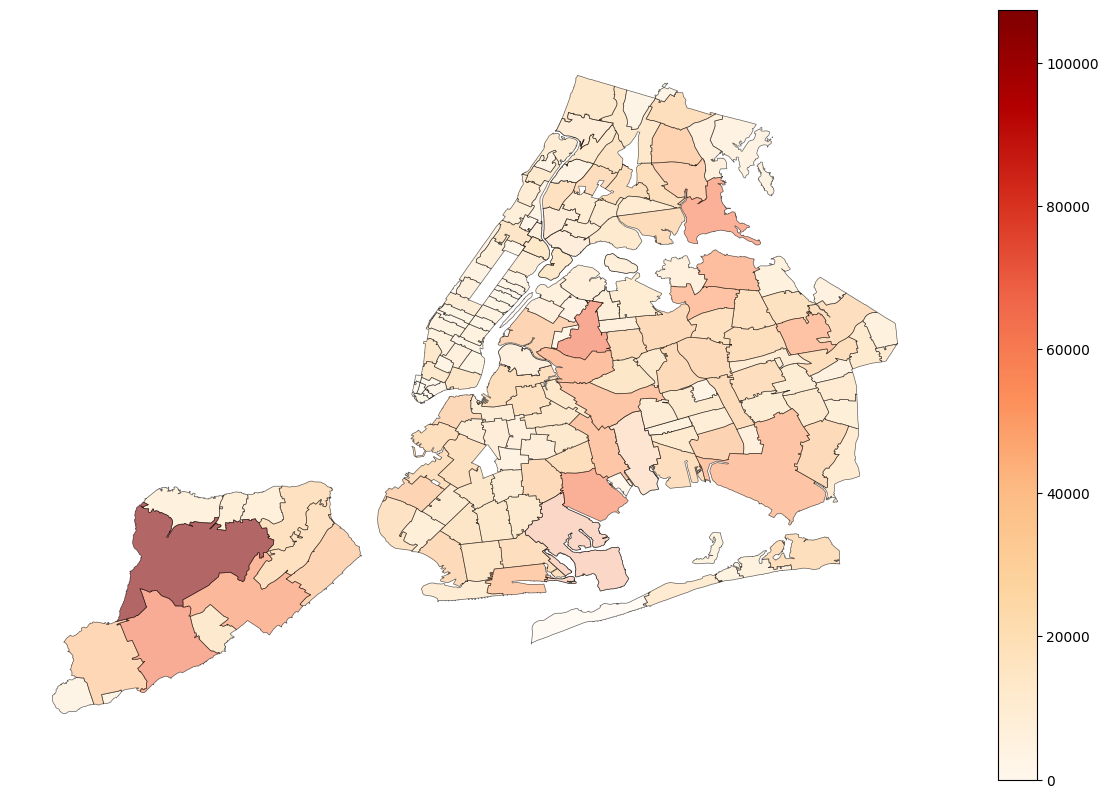

In [27]:

fig, ax = plt.subplots(figsize=(15, 10))

zip_merged_gdf.plot(ax=ax, column='trucks_visit_count', cmap='OrRd', edgecolor='black', linewidth=0.5, alpha=0.6, legend=True)
ax.set_axis_off()
plt.show()

In [28]:
gdf.groupby(['nta_neighborhood', 'borough_text']).plow_bracket.describe()

count unique     top freq
nta_neighborhood                       borough_text                           
Allerton                               Bronx           195      6  26-36+  106
Alley Pond Park                        Queens          148      8  26-36+  100
Annadale-Huguenot-Prince's Bay-Woodrow Staten Island  1341      8  26-36+  342
Arden Heights-Rossville                Staten Island   616      8  26-36+  202
Astoria (Central)                      Queens          192      7  26-36+   97
...                                                    ...    ...     ...  ...
Woodhaven                              Brooklyn         10      1  26-36+   10
                                       Queens          428      7  26-36+  171
Woodlawn Cemetery                      Bronx             7      3   13-16    5
Woodside                               Queens          716      8  26-36+  373
Yankee Stadium-Macombs Dam Park        Bronx            30      5  26-36+   19

[265 rows x 4 columns]

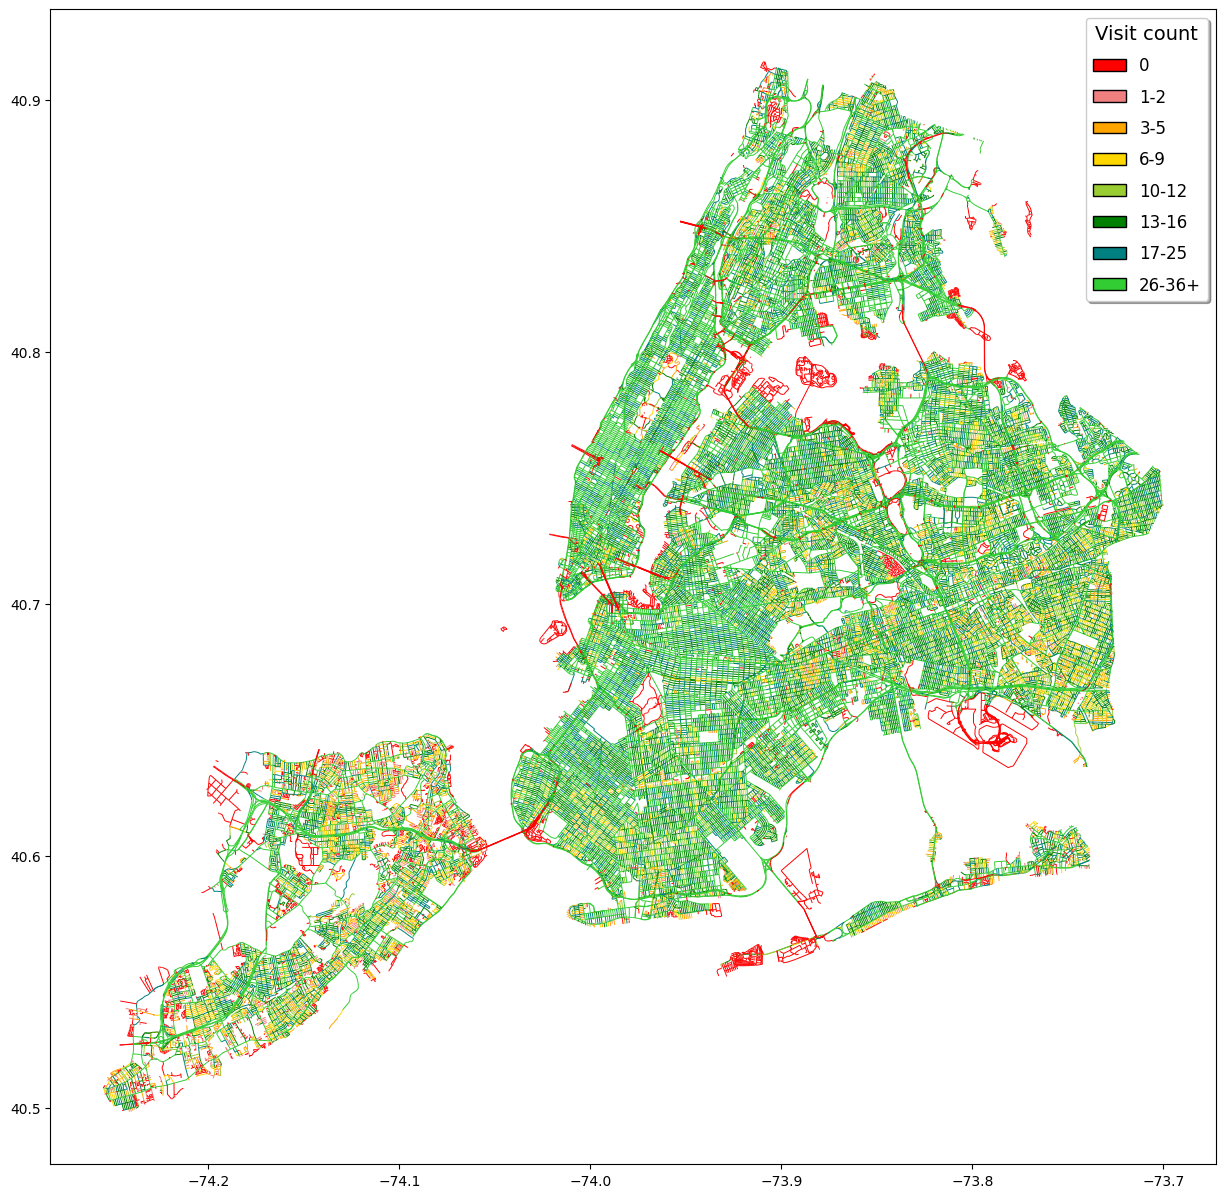

In [29]:
from matplotlib.patches import Patch
import matplotlib.pyplot as plt

bracket_colors = {
    '0': 'red',
    '1-2': 'lightcoral', 
    '3-5': 'orange',
    '6-9': 'gold',
    '10-12': 'yellowgreen',
    '13-16': 'green',
    '17-25': 'teal',
    '26-36+': 'limegreen'
}

fig, ax = plt.subplots(1, 1, figsize=(20, 15))

gdf.plot(
    color=gdf['plow_bracket'].map(bracket_colors).fillna('red'),
    ax=ax,
    linewidth=0.7
)

legend_elements = [
    Patch(facecolor=color, edgecolor='black', label=label)
    for label, color in bracket_colors.items()
]

ax.legend(
    handles=legend_elements,
    title="Visit count",
    loc='upper right',
    fontsize=12,
    title_fontsize=14,
    frameon=True,
    fancybox=True,
    shadow=True,
    labelspacing=0.8
)

plt.show()

In [30]:
import contextily as ctx

gdf = gdf.set_crs(epsg=4326)
gdf_web = gdf.to_crs(epsg=3857)
gdf_web.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 110997 entries, 0 to 110996
Data columns (total 62 columns):
 #   Column                  Non-Null Count   Dtype   
---  ------                  --------------   -----   
 0   the_geom                110997 non-null  object  
 1   physicalid              110997 non-null  object  
 2   l_low_hn                83959 non-null   object  
 3   l_high_hn               83959 non-null   object  
 4   r_low_hn                83959 non-null   object  
 5   r_high_hn               83959 non-null   object  
 6   l_zip                   110688 non-null  object  
 7   r_zip                   110775 non-null  object  
 8   status                  110997 non-null  object  
 9   trafdir                 110995 non-null  object  
 10  rw_type                 110997 non-null  object  
 11  pre_type                2769 non-null    object  
 12  objectid                110997 non-null  object  
 13  l_blockfaceid           104194 non-null  object  
 

In [31]:
import folium
from folium.features import GeoJsonTooltip
from folium.plugins import Geocoder

# Processing gdf
gdf_web_folium = gdf_web[['plow_bracket', 'trucks_visit_count', 'geometry', 'l_zip', 
                          'nta_neighborhood', 'full_street_name']].copy()

gdf_web_folium['geometry'] = gdf_web_folium['geometry'].simplify(tolerance=0.0001)
gdf_web_folium = gdf_web_folium.rename(columns={'l_zip':'zip_code', 'nta_neighborhood': 'neighborhood'})
gdf_web_folium['plow_bracket'] = gdf_web_folium['plow_bracket'].astype(str).str.strip()
gdf_web_folium['trucks_visit_count'] = gdf_web_folium['trucks_visit_count'].astype(int)
gdf_web_folium = gdf_web_folium.to_crs(epsg=4326)

# Setting up Folium base map
m = folium.Map(
    location=[40.7128, -74.0060],
    zoom_start=11,
    tiles="CartoDB Positron",
    prefer_canvas=True
)

bracket_colors = {
    '0': 'red',
    '1-2': 'lightcoral', 
    '3-5': 'orange',
    '6-9': 'gold',
    '10-12': 'yellowgreen',
    '13-16': 'green',
    '17-25': 'teal',
    '26-36+': 'limegreen'
}

def style_function(x):
    bracket = str(x['properties']['plow_bracket']).strip()
    color = bracket_colors.get(bracket, 'lightgrey')
    return {
        'fillColor': color,
        'color': color,
        'weight': 1.2,
        'fillOpacity': 0.5
    }


tooltip = GeoJsonTooltip(
    fields=['full_street_name', 'neighborhood', 'zip_code', 'trucks_visit_count'],
    aliases=['Street Name:', 'Neighborhood', 'Zip Code:', 'Truck Visit Count:'],
    localize=True
)

folium.GeoJson(
    gdf_web_folium.to_json(),
    style_function=style_function,
    tooltip=tooltip,
    name="Snow Removal"
).add_to(m)

# Adding a Geocoder search bar
Geocoder(collapsed=False, add_marker=True).add_to(m)

m.get_root().html.add_child(folium.Element("""
<style>
.leaflet-control-geocoder {
    z-index: 1100 !important;
}
</style>
"""))

# Adding customized legends 
legend_html = '''
<div style="
    position: fixed; 
    bottom: 50px; left: 50px; width: 220px; height: auto; 
    border:2px solid grey; z-index:999; font-size:14px;
    background-color:white; padding:10px;
    box-shadow: 3px 3px 6px rgba(0,0,0,0.3);
">
    <b>DSNY Snow Removal<br>Truck Visit Count</b><br><br>
'''
for label, color in bracket_colors.items():
    legend_html += f'''
    <i style="background:{color};width:18px;height:18px;
              display:inline-block;margin-right:5px;
              border:1px solid black;"></i>{label}<br>
    '''
legend_html += '</div>'

m.get_root().html.add_child(folium.Element(legend_html))

# Saving the map into html
m.save(viz_dir / 'FebStorm_interactive_snow_plowing.html')


In [32]:
gdf[
    (gdf.rw_type_text == 'Street') &
    (gdf.trucks_visit_count == 0)
    ].shape[0] / gdf.shape[0]

0.07150643711091291

In [33]:
gdf[
    (gdf.rw_type_text == 'Street') &
    (gdf.trucks_visit_count == 0)
    ].borough_text.value_counts(normalize=True)

borough_text
Queens           0.334005
Staten Island    0.261686
Bronx            0.155726
Brooklyn         0.142623
Manhattan        0.105959
Name: proportion, dtype: float64

In [34]:
gdf.columns

Index(['the_geom', 'physicalid', 'l_low_hn', 'l_high_hn', 'r_low_hn',
       'r_high_hn', 'l_zip', 'r_zip', 'status', 'trafdir', 'rw_type',
       'pre_type', 'objectid', 'l_blockfaceid', 'r_blockfaceid', 'boroughcode',
       'seglocstatus', 'lsubsect', 'rsubsect', 'twisted_parity_flag',
       'posted_speed', 'segmentlength', 'streetwidth', 'created_date',
       'modified_date', 'from_level_code', 'to_level_code', 'b5sc',
       'snow_priority', 'number_travel_lanes', 'number_park_lanes',
       'number_total_lanes', 'full_street_name', 'shape_length', 'globalid',
       'street_name', 'stname_label', 'post_type', 'collectionmethod',
       'pre_directional', 'truck_route_type', 'nonped', 'bike_lane',
       'bike_trafdir', 'rwjurisdiction', 'carto_display_level',
       'post_modifier', 'post_directional', 'within_bndy_dist',
       'continuous_parity_flag', 'accessible', 'borough_indicator',
       'pre_modifier', 'sandist_ind', 'fcc', 'borough_text', 'rw_type_text',
       'physi

In [35]:
gdf[
    (gdf.rw_type_text == 'Street') &
    (gdf.trucks_visit_count < 2)
    ].shape[0] / gdf.shape[0]

0.07552456372694757

In [36]:
gdf.groupby(['rw_type_text']).plow_bracket.value_counts(normalize=True).unstack()

plow_bracket,0,1-2,3-5,6-9,10-12,13-16,17-25,26-36+
rw_type_text,,,,,,,,
Bridge,0.020194,0.040389,0.087509,0.066567,0.074794,0.163800,0.131638,0.415108
Highway,0.005143,0.014914,0.031371,0.024685,0.033428,0.071227,0.084083,0.735150
Ramp,0.024561,0.047368,0.071930,0.048070,0.058596,0.132982,0.122105,0.494386
Street,0.011923,0.030403,0.059987,0.056851,0.085997,0.182879,0.153995,0.417964
Tunnel,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
U Turn,0.161290,0.096774,0.225806,0.096774,0.096774,0.112903,0.064516,0.145161


In [50]:
gdf[gdf.trucks_visit_count == 0].borough_text.value_counts(normalize=True)

borough_text
Queens           0.309528
Manhattan        0.200159
Staten Island    0.197076
Bronx            0.150141
Brooklyn         0.143096
Name: proportion, dtype: float64